In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer, precision_score, f1_score, confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings(
"ignore", category=UserWarning
)
warnings.filterwarnings(
"ignore", category=FutureWarning)
%matplotlib inline


In [48]:
train_data = pd.read_csv("Train_data.csv")
test_data = pd.read_csv("test_data.csv")

In [49]:
train_data.shape

(2351, 25)

In [50]:
test_data.shape

(447, 25)

In [51]:
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [52]:
#ce_OHE = ce.OneHotEncoder(cols = ['Disease'])
#train_data = ce_OHE.fit_transform(train_data)

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [54]:
train_data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [55]:
train_data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


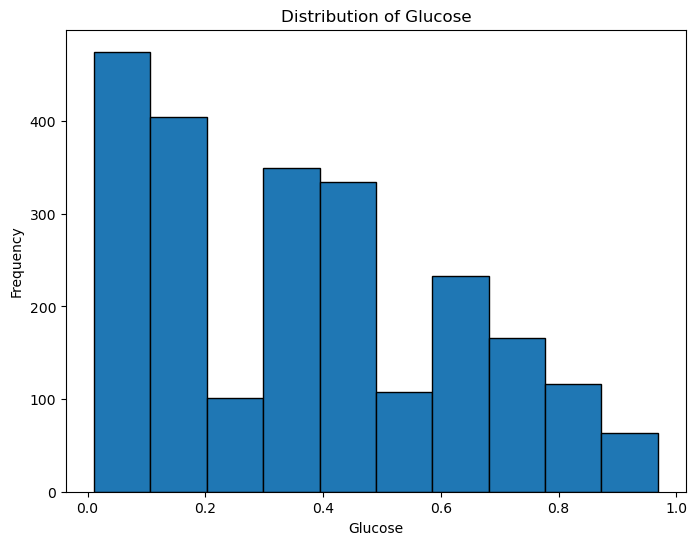

In [56]:
plt.figure(figsize = (8,6))
plt.hist(train_data['Glucose'], bins=10, edgecolor = 'k')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose')
plt.show()

Text(0.5, 1.0, 'Box plot of Glucose')

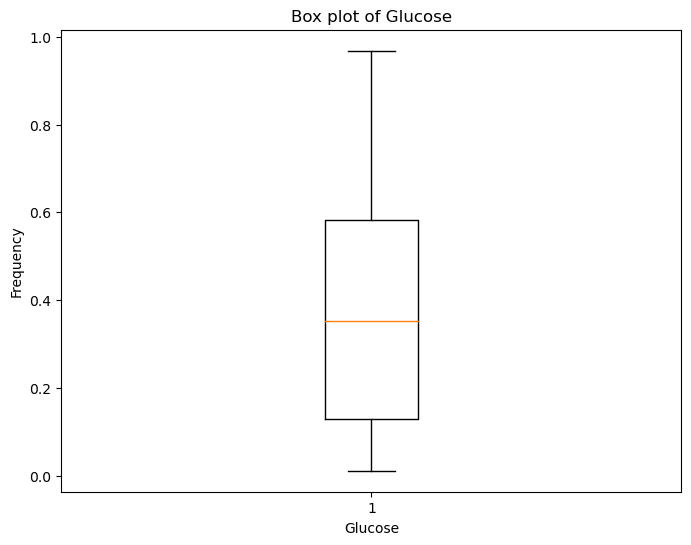

In [57]:
plt.figure(figsize=(8,6))
plt.boxplot(train_data['Glucose'], showfliers=True)
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title("Box plot of Glucose")

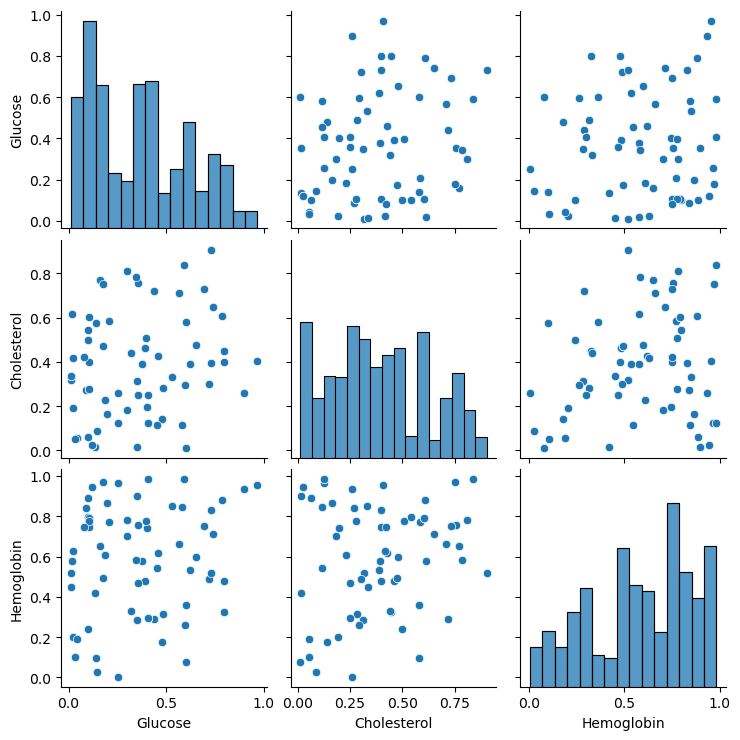

In [58]:
sns.pairplot(train_data[['Glucose', 'Cholesterol', 'Hemoglobin']])
plt.show()

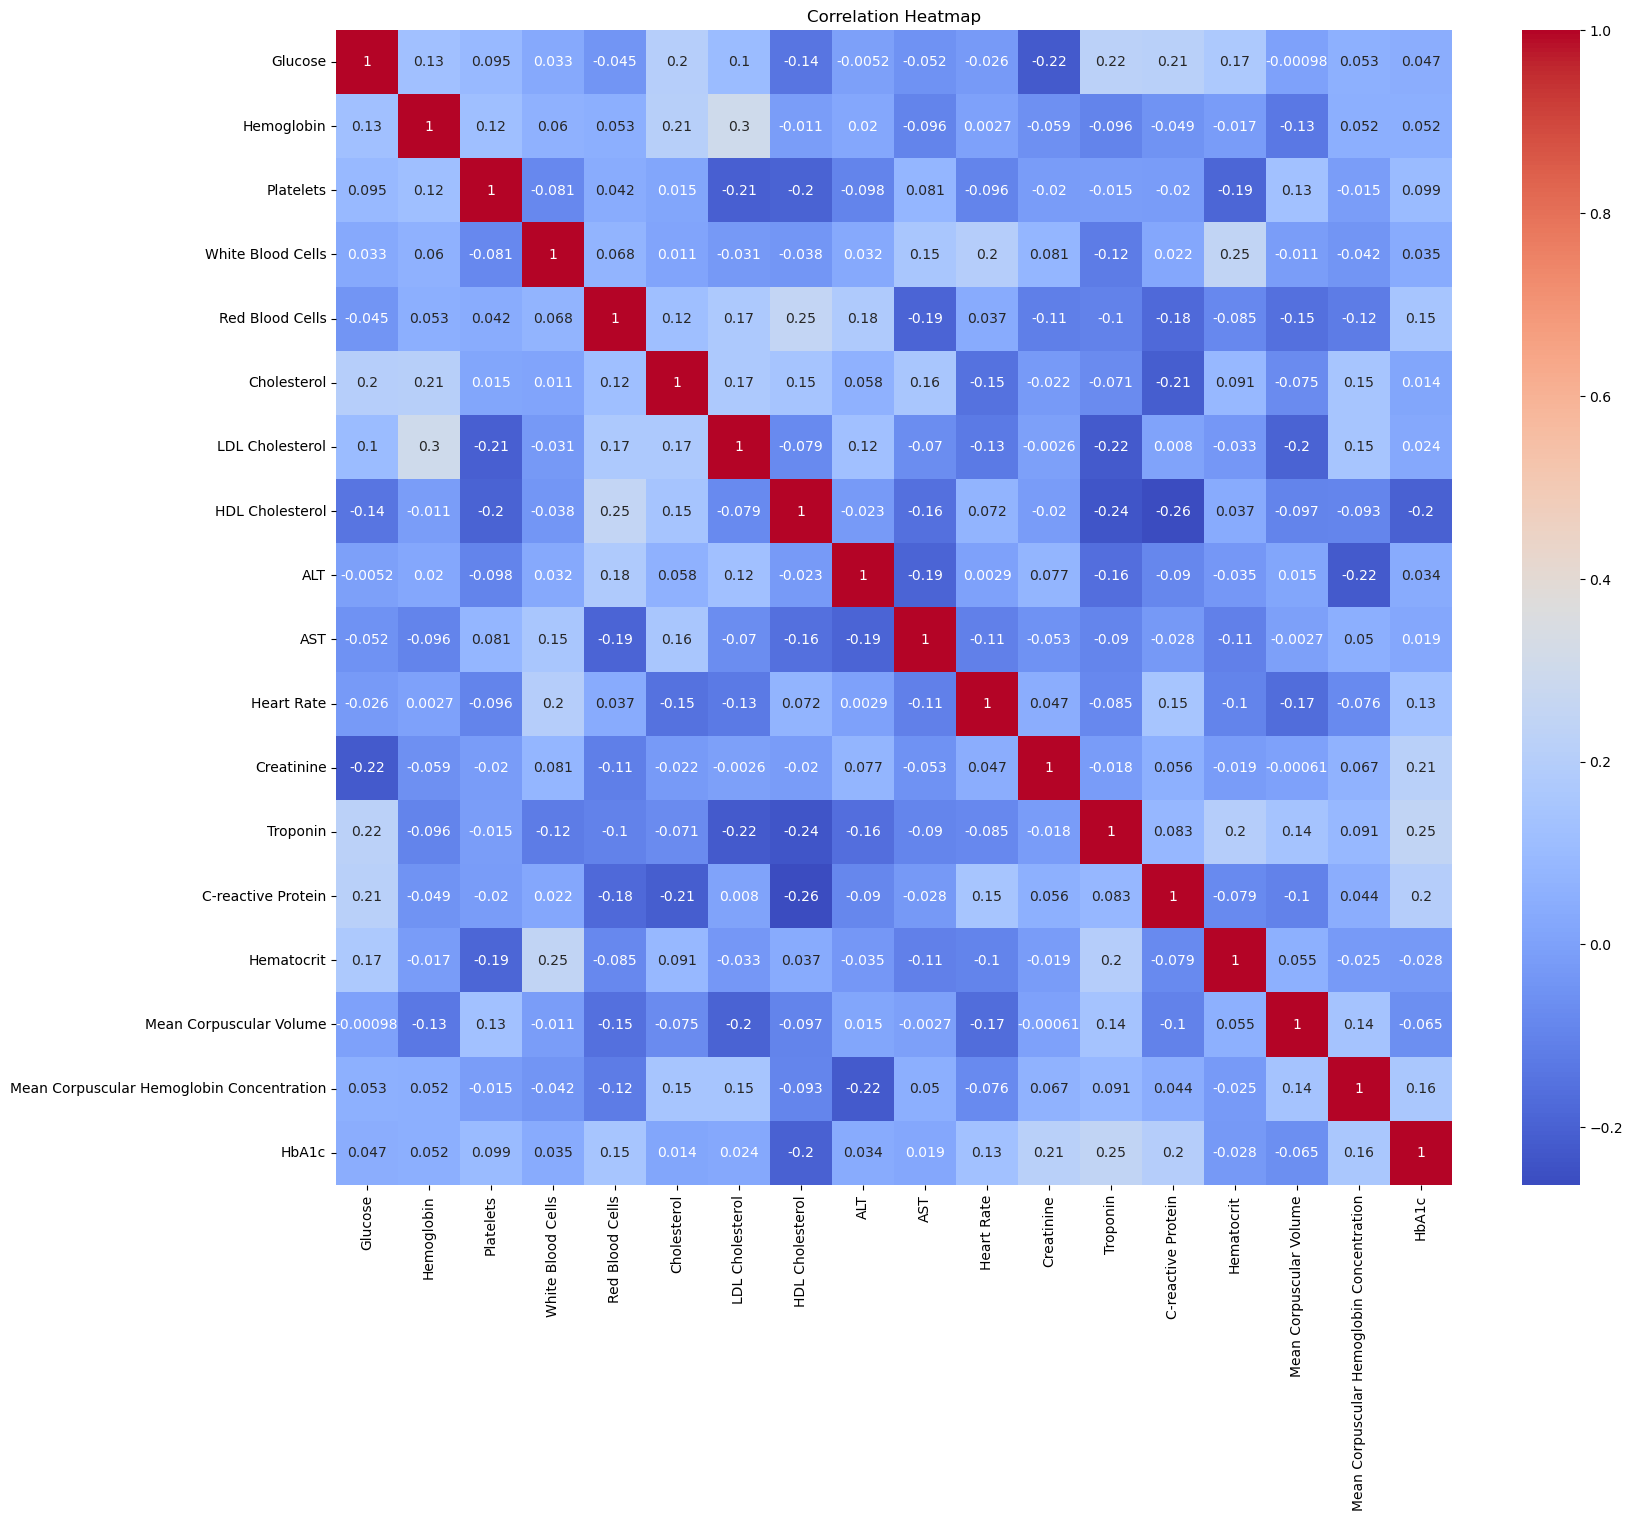

In [59]:
plt.figure(figsize = (18, 15))
sns.heatmap(train_data[['Glucose', 'Hemoglobin', 'Platelets','White Blood Cells', 'Red Blood Cells', 'Cholesterol','LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST', 'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein', 'Hematocrit', 'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin Concentration', 'HbA1c']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

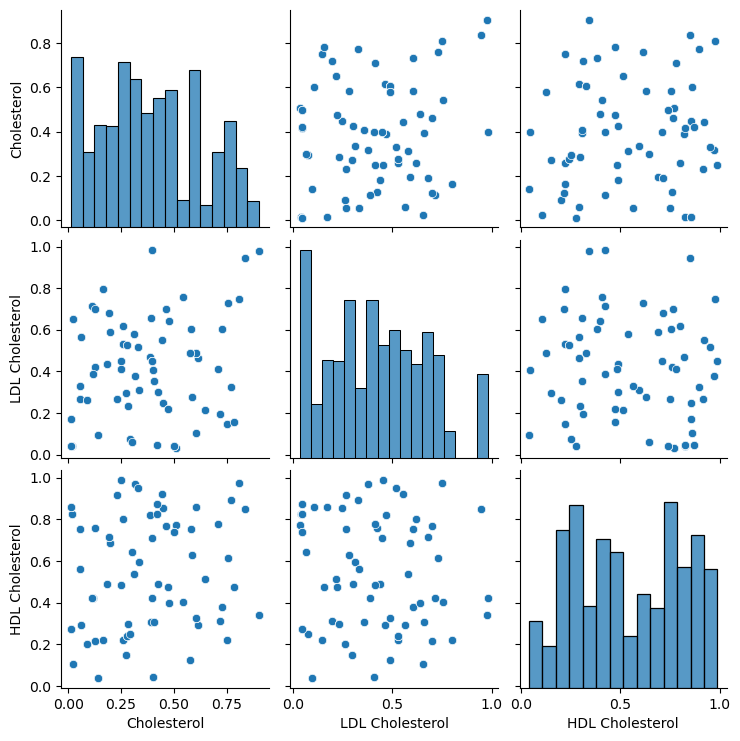

In [60]:
sns.pairplot(train_data[['Cholesterol','LDL Cholesterol', 'HDL Cholesterol']])
plt.show()

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [62]:
y_train = train_data['Disease']
X_train = train_data.drop('Disease', axis = 1)

In [63]:
X_test = test_data.drop('Disease', axis = 1)
y_test = test_data['Disease']

In [64]:
label_encoder = LabelEncoder()

In [65]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [66]:
print(y_train_encoded)

[2 1 3 ... 0 1 0]


In [67]:
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train).toarray()
X_test_encoded = encoder.fit_transform(X_test).toarray()

In [68]:
gbc = GradientBoostingClassifier(random_state = 42)
model = gbc.fit(X_train, y_train_encoded)

In [69]:

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4899328859060403


In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gbc, param_grid = param_grid, scoring='accuracy', cv = 5, n_jobs=-1)

grid_search.fit(X_train, y_train_encoded)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score: 1.0


In [71]:
best_gb_classifier = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)

In [72]:
cv_scores = cross_val_score(best_gb_classifier, X_test, y_test_encoded, cv=10, scoring='accuracy')

In [73]:
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [1.         0.95555556 0.95555556 0.97777778 0.95555556 0.93333333
 0.88888889 1.         0.97727273 0.97727273]
Mean CV Accuracy: 0.9621212121212122
